In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('/content/drive/My Drive/data/Copy of general_data.csv')
data.head()


Age Attrition  ... YearsSinceLastPromotion YearsWithCurrManager
0   51        No  ...                       0                    0
1   31       Yes  ...                       1                    4
2   32        No  ...                       0                    3
3   38        No  ...                       7                    5
4   32        No  ...                       0                    4

[5 rows x 24 columns]

# CHECKING NULL VALUES

In [ ]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [ ]:
data['NumCompaniesWorked']

0       1.0
1       0.0
2       1.0
3       3.0
4       4.0
       ... 
4405    3.0
4406    2.0
4407    0.0
4408    0.0
4409    0.0
Name: NumCompaniesWorked, Length: 4410, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

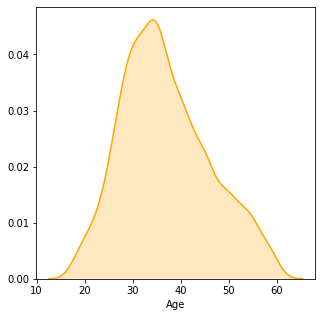

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(data['Age'],hist=False,color='orange',kde_kws = {"shade":True})

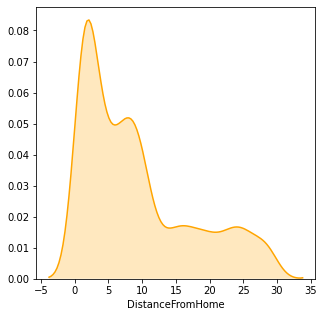

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(data['DistanceFromHome'],hist=False,color='orange',kde_kws = {"shade":True})

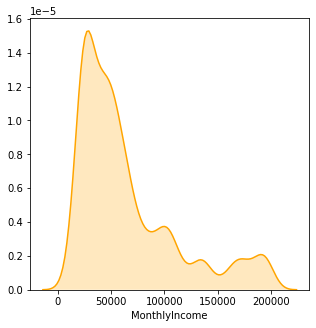

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(data['MonthlyIncome'],hist=False,color='orange',kde_kws = {"shade":True})

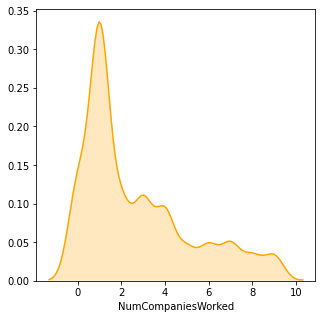

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(data['NumCompaniesWorked'],hist=False,color='orange',kde_kws = {"shade":True})

In [ ]:
data.corr()

Age  ...  YearsWithCurrManager
Age                      1.000000  ...              0.202089
DistanceFromHome         0.006963  ...              0.021584
Education               -0.035706  ...              0.005358
EmployeeCount                 NaN  ...                   NaN
EmployeeID               0.008649  ...              0.008579
JobLevel                -0.002884  ...             -0.055251
MonthlyIncome           -0.044314  ...              0.024304
NumCompaniesWorked       0.299243  ...             -0.109667
PercentSalaryHike       -0.033137  ...             -0.040864
StandardHours                 NaN  ...                   NaN
StockOptionLevel        -0.031753  ...              0.017757
TotalWorkingYears        0.680661  ...              0.458800
TrainingTimesLastYear   -0.027308  ...             -0.013270
YearsAtCompany           0.311309  ...              0.769212
YearsSinceLastPromotion  0.216513  ...              0.510224
YearsWithCurrManager     0.202089  ...              1.000000

[16 rows x 16 columns]

In [ ]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

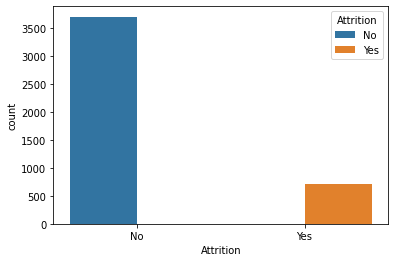

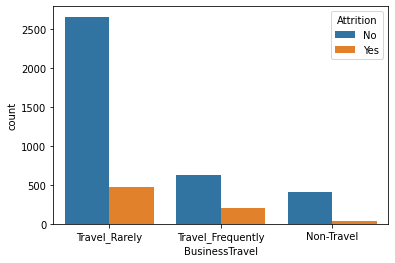

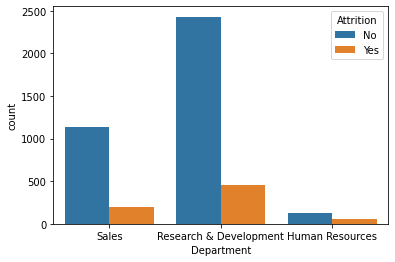

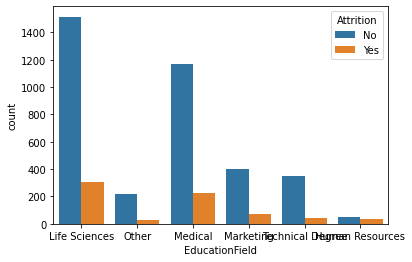

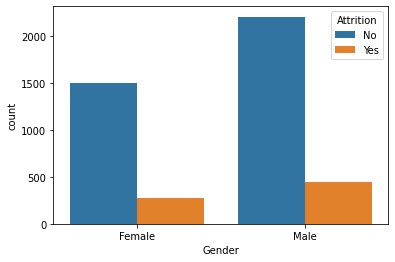

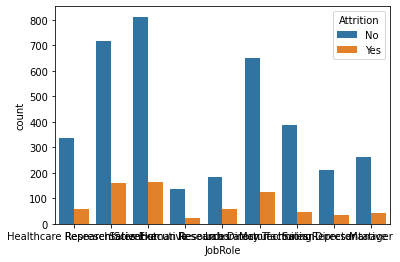

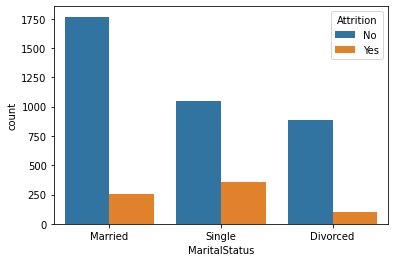

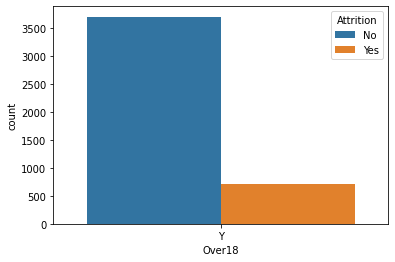

In [ ]:

for i in data.columns:
    if(data[i].dtype=='object'):
        sns.countplot(x=i,hue='Attrition',data=data)
        plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


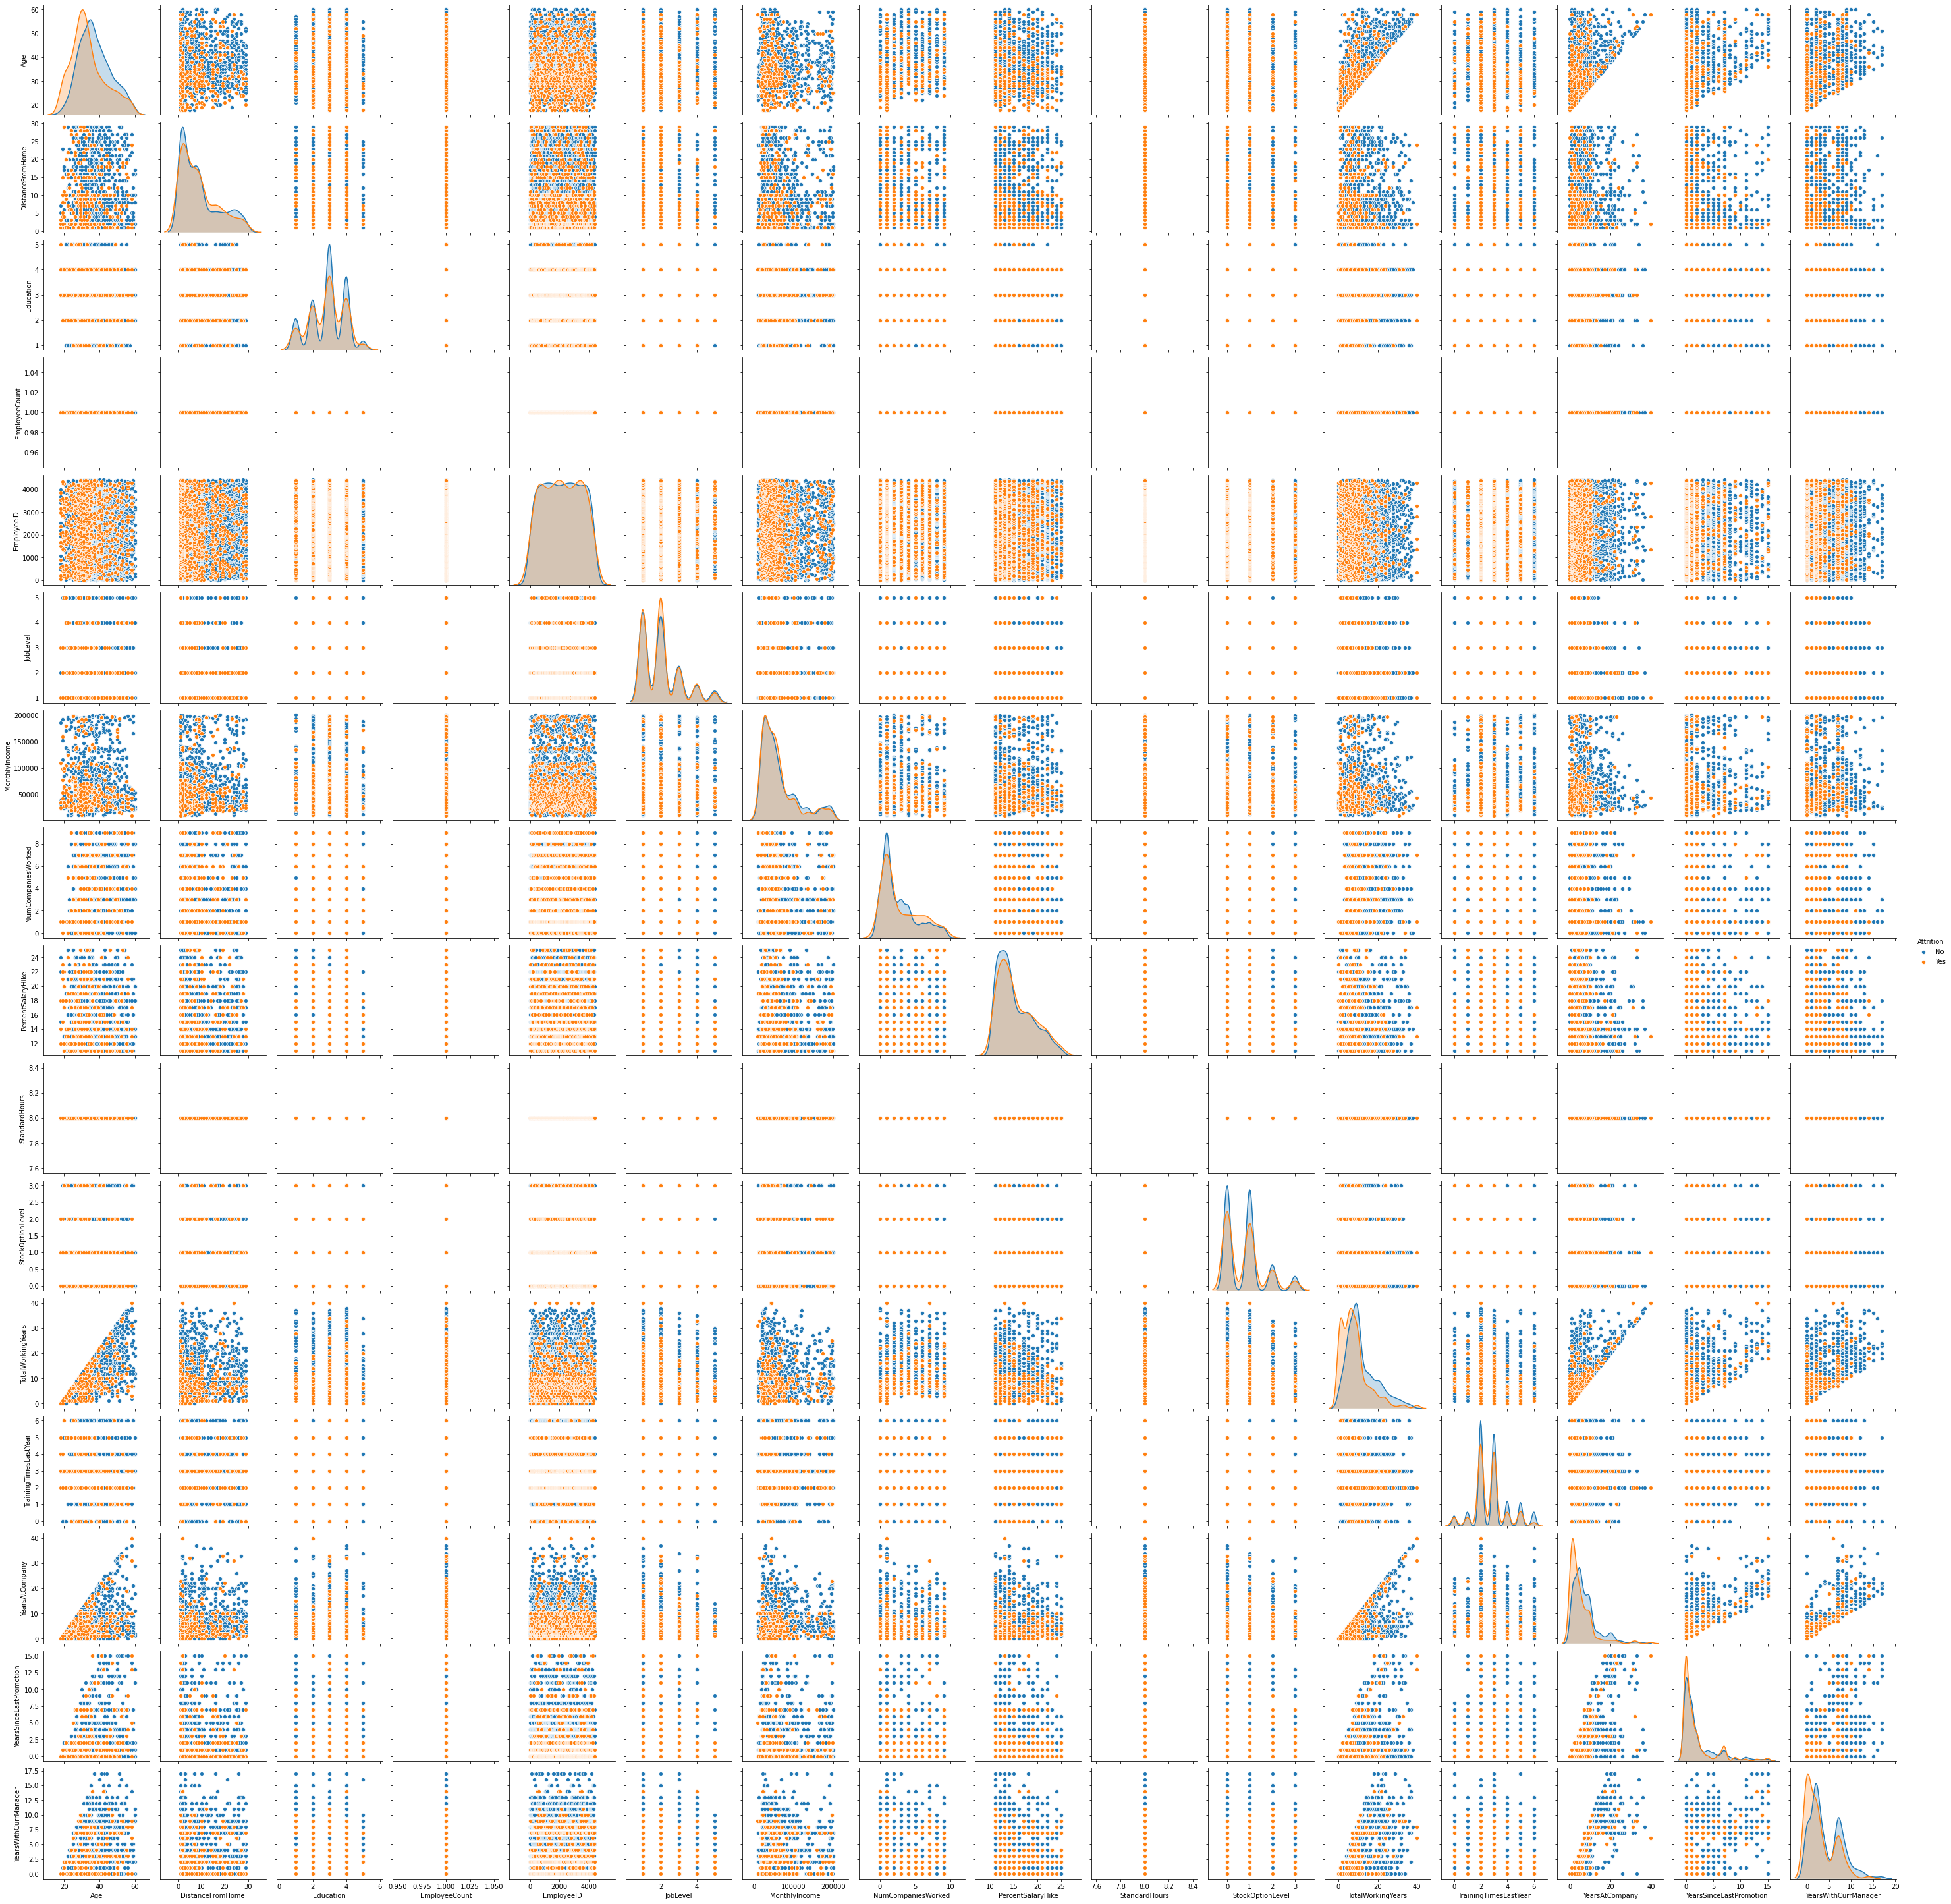

In [ ]:
sns.pairplot(data,hue='Attrition')
plt.show()

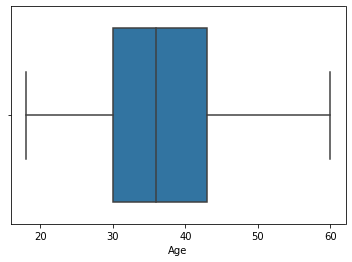

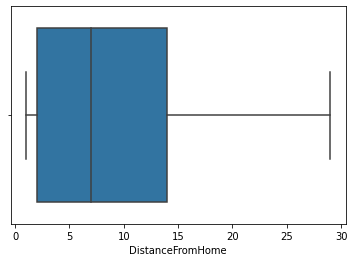

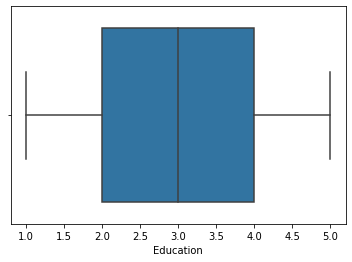

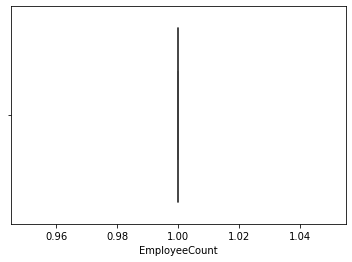

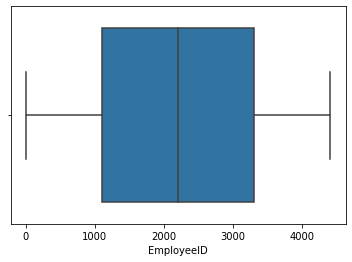

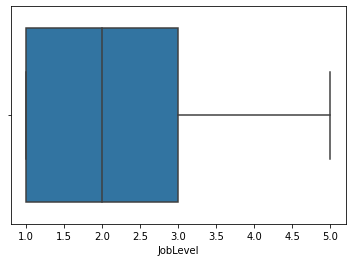

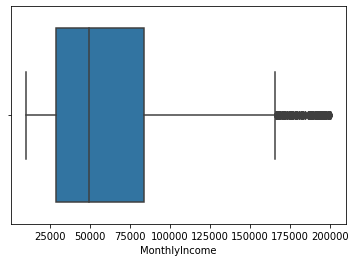

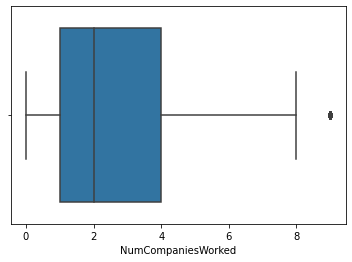

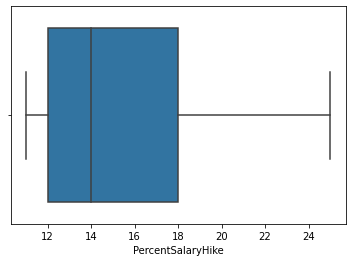

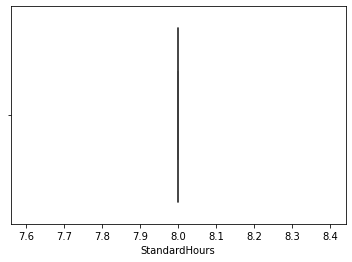

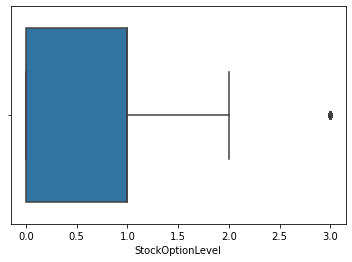

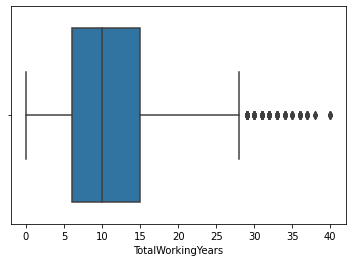

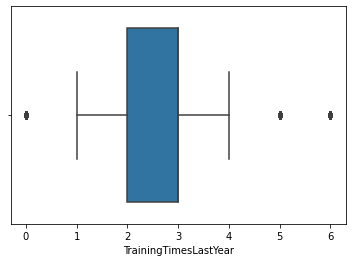

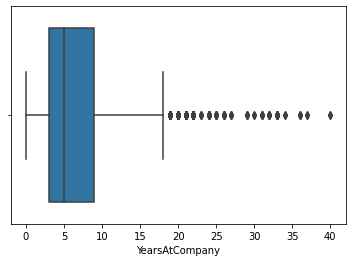

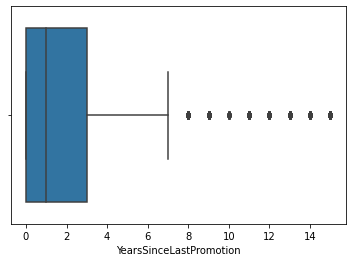

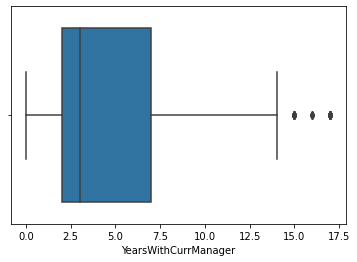

In [ ]:
for i in data.columns:
    if(data[i].dtype!='object'):
        sns.boxplot(x=i,hue='Attrition',data=data)
        plt.show()

In [ ]:
colwithoutliers=['MonthlyIncome','NumCompaniesWorked','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']

In [ ]:
for i in colwithoutliers:
    print(i)
    IQR=data[i].quantile(0.75)-data[i].quantile(0.25)
    lower_bridge=data[i].quantile(0.25)-(IQR*1.5)
    higher_bridge=data[i].quantile(0.75)+(IQR*1.5)
    print(IQR,lower_bridge,higher_bridge)
    


MonthlyIncome
54690.0 -52925.0 165835.0
NumCompaniesWorked
3.0 -3.5 8.5
TotalWorkingYears
9.0 -7.5 28.5
TrainingTimesLastYear
1.0 0.5 4.5
YearsAtCompany
6.0 -6.0 18.0
YearsSinceLastPromotion
3.0 -4.5 7.5
YearsWithCurrManager
5.0 -5.5 14.5


In [ ]:
for i in colwithoutliers:
    IQR=data[i].quantile(0.75)-data[i].quantile(0.25)
    lower_bridge=data[i].quantile(0.25)-(IQR*1.5)
    higher_bridge=data[i].quantile(0.75)+(IQR*1.5)
    data=data[data[i]<higher_bridge]
    print(data[i].max())

165550
8.0
28.0
4
17
4
8


In [ ]:
data.describe().T

count          mean  ...       75%       max
Age                      2540.0     35.370472  ...     41.00      60.0
DistanceFromHome         2540.0      8.973622  ...     13.00      29.0
Education                2540.0      2.911024  ...      4.00       5.0
EmployeeCount            2540.0      1.000000  ...      1.00       1.0
EmployeeID               2540.0   2217.520472  ...   3308.25    4408.0
JobLevel                 2540.0      2.086614  ...      3.00       5.0
MonthlyIncome            2540.0  55244.440945  ...  67960.00  164370.0
NumCompaniesWorked       2540.0      2.567323  ...      4.00       8.0
PercentSalaryHike        2540.0     15.337008  ...     18.00      25.0
StandardHours            2540.0      8.000000  ...      8.00       8.0
StockOptionLevel         2540.0      0.809055  ...      1.00       3.0
TotalWorkingYears        2540.0      8.891339  ...     11.00      28.0
TrainingTimesLastYear    2540.0      2.441339  ...      3.00       4.0
YearsAtCompany           2540.0      4.471654  ...      6.00      16.0
YearsSinceLastPromotion  2540.0      0.794488  ...      1.00       4.0
YearsWithCurrManager     2540.0      2.732283  ...      4.00       8.0

[16 rows x 8 columns]

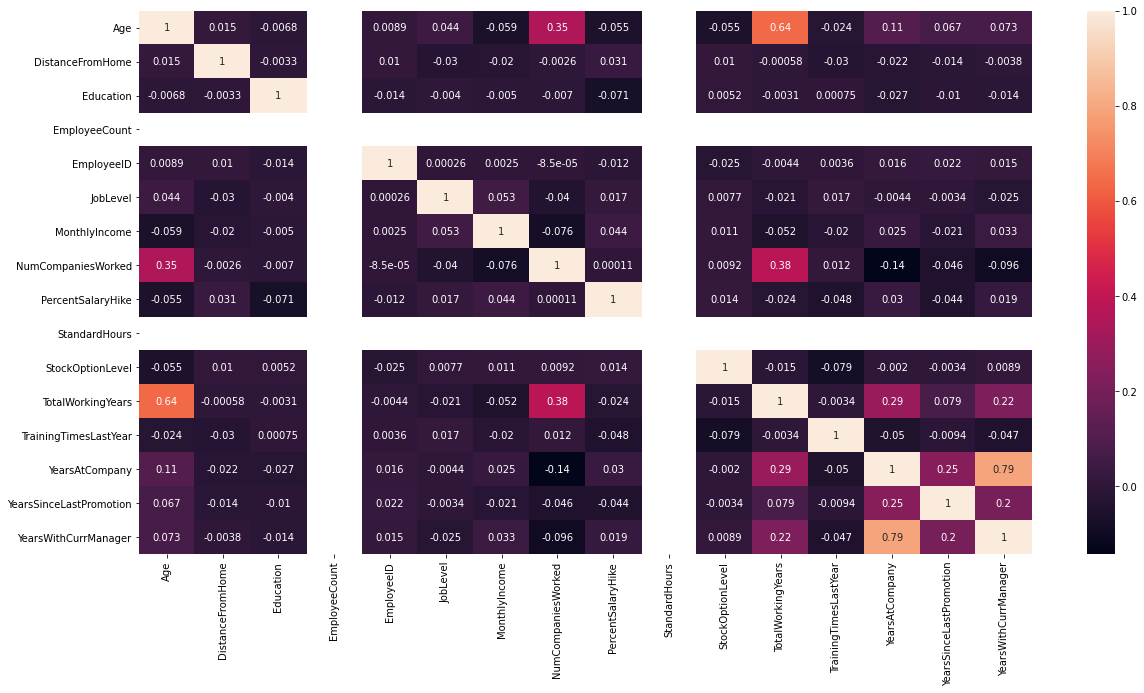

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

In [ ]:

data.head()

Age Attrition  ... YearsSinceLastPromotion YearsWithCurrManager
1   31       Yes  ...                       1                    4
4   32        No  ...                       0                    4
6   28       Yes  ...                       0                    0
7   29        No  ...                       0                    0
9   25        No  ...                       1                    5

[5 rows x 24 columns]

In [ ]:
colstoenco=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18']
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in colstoenco:
    data[i]=enc.fit_transform(data[i])
data.head()


Age Attrition  ...  YearsSinceLastPromotion  YearsWithCurrManager
0   51        No  ...                        0                     0
1   31       Yes  ...                        1                     4
2   32        No  ...                        0                     3
3   38        No  ...                        7                     5
4   32        No  ...                        0                     4

[5 rows x 24 columns]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

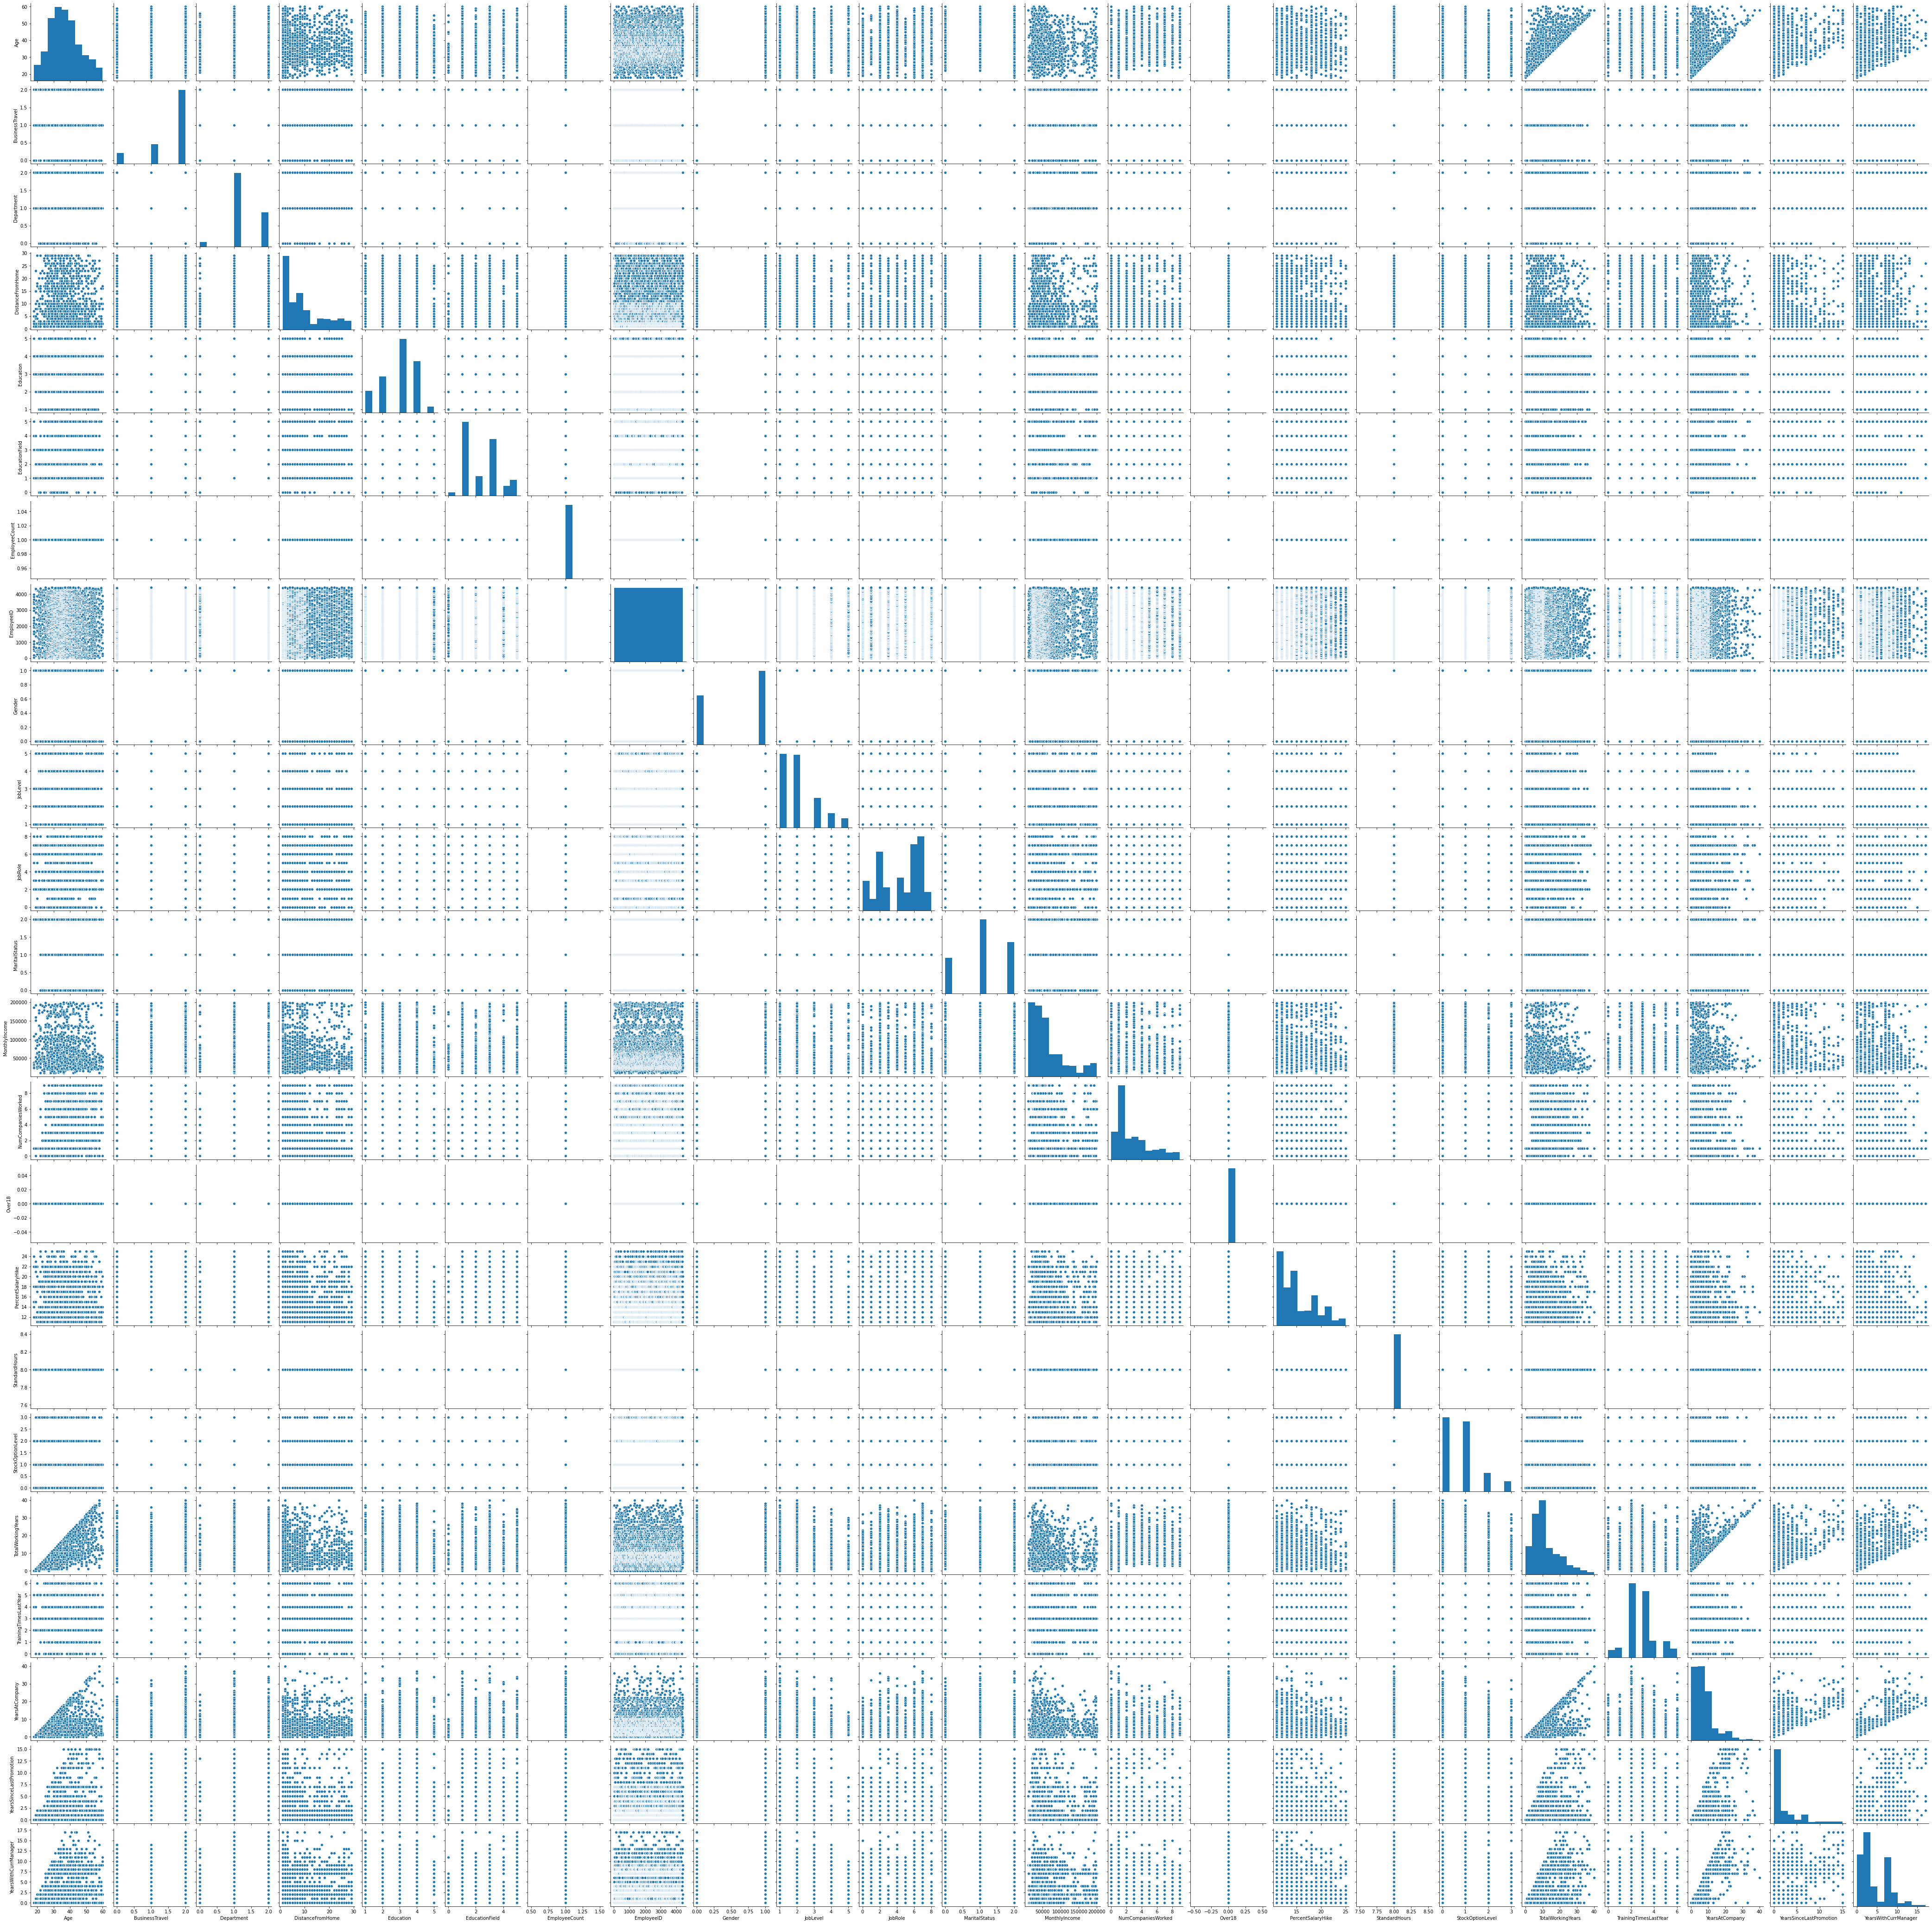

In [52]:
sns.pairplot(data)
plt.show()

# BASE MODEL

In [ ]:
x=data.drop('Attrition',axis=1)
y=data.Attrition
data.head()

Age Attrition  ...  YearsSinceLastPromotion  YearsWithCurrManager
0   51        No  ...                        0                     0
1   31       Yes  ...                        1                     4
2   32        No  ...                        0                     3
3   38        No  ...                        7                     5
4   32        No  ...                        0                     4

[5 rows x 24 columns]

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20,test_size=0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3528, 23) (882, 23) (3528,) (882,)


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

# FROM EDA THE FEATURES I THOUGHT OF BEST IS

In [56]:
xeda=x[['DistanceFromHome','JobLevel','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','Gender']]
xeda

DistanceFromHome  JobLevel  ...  PercentSalaryHike  Gender
0                    6         1  ...                 11       0
1                   10         1  ...                 23       0
2                   17         4  ...                 15       1
3                    2         3  ...                 11       1
4                   10         1  ...                 12       1
...                ...       ...  ...                ...     ...
4405                 5         1  ...                 17       0
4406                 2         1  ...                 15       1
4407                25         2  ...                 20       1
4408                18         1  ...                 14       1
4409                28         2  ...                 12       1

[4410 rows x 6 columns]

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xeda,y,random_state=30,test_size=0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3528, 6) (882, 6) (3528,) (882,)


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
x.head()